In [833]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import datetime
import sklearn as sk
from sklearn.linear_model import LinearRegression

In [834]:
# membaca file dan ubah tanggal menjadi time series
df = pd.read_csv("sumaterabarat.csv")
df['Tanggal'] = pd.to_datetime(df.Tanggal)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Tanggal  365 non-null    datetime64[ns]
 1   Tn       350 non-null    float64       
 2   Tx       363 non-null    float64       
 3   Tavg     364 non-null    float64       
 4   RH_avg   364 non-null    float64       
 5   RR       314 non-null    float64       
 6   ss       363 non-null    float64       
 7   ff_x     364 non-null    float64       
 8   ddd_x    363 non-null    float64       
 9   ff_avg   364 non-null    float64       
 10  ddd_car  364 non-null    object        
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 31.5+ KB


<ipython-input-834-d618159ace47>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Tanggal'] = pd.to_datetime(df.Tanggal)


In [835]:
#ambil data tanggal, tn (temperatur minimum), tx(temperatur maksimum), RR(curah hujan), Tavg(tempeartur rata rata)
df1 = df[["Tanggal", "Tn","Tx","RR", "Tavg"]]
df1

,Tanggal,Tn,Tx,RR,Tavg
0,2023-01-01,21.2,33.4,0.2,25.8
1,2023-02-01,21.9,31.0,23.2,25.6
2,2023-03-01,22.2,30.2,5.5,25.6
3,2023-04-01,21.0,32.2,0.0,25.8
4,2023-05-01,21.8,31.8,NaN,25.1
...,...,...,...,...,...
360,2023-12-16,22.7,31.8,8888.0,28.0
361,2023-12-17,23.6,31.6,0.0,28.0
362,2023-12-18,23.7,30.3,39.3,25.9
363,2023-12-19,23.4,31.0,89.9,26.7


In [836]:
# cek duplikat
df1.duplicated('Tanggal', keep=False).sum()

22

In [837]:
# hapus duplikat
df1 = df1.drop_duplicates('Tanggal', keep='first').reset_index()
df1.duplicated().sum()

0

In [838]:
# ganti kode 8888 menjadi 0.0
df1 = df1.replace(8888, 0.0)
df1.loc[df1['RR']==8888].count()

index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       0
dtype: int64

In [839]:
# sort berdasarkan tanggal
df1 = df1.sort_values(by=["Tanggal"]).reset_index()
df1

,level_0,index,Tanggal,Tn,Tx,RR,Tavg
0,0,0,2023-01-01,21.2,33.4,0.2,25.8
1,31,31,2023-01-02,22.0,31.8,21.6,26.4
2,59,60,2023-01-03,21.5,30.6,26.5,25.4
3,90,92,2023-01-04,21.8,30.4,7.0,24.8
4,120,123,2023-01-05,23.2,32.4,25.7,26.2
...,...,...,...,...,...,...,...
349,349,360,2023-12-16,22.7,31.8,0.0,28.0
350,350,361,2023-12-17,23.6,31.6,0.0,28.0
351,351,362,2023-12-18,23.7,30.3,39.3,25.9
352,352,363,2023-12-19,23.4,31.0,89.9,26.7


In [840]:
#cek null
df1.isnull().sum()

level_0     0
index       0
Tanggal     0
Tn         14
Tx          2
RR         49
Tavg        1
dtype: int64

In [841]:
# isi yang null
mrr = df1['RR'].mean()
tnn = df1['Tn'].mean()
txx = df1['Tx'].mean()
mav = (df1['Tn'] + df1['Tx'])/2

df1['RR'] = df1['RR'].fillna(mrr)
df1['Tn'] = df1['Tn'].fillna(tnn)
df1['Tx'] = df1['Tx'].fillna(txx)
df1['Tavg'] = df1['Tavg'].fillna(mav)

df1.isnull().sum()

level_0    0
index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       1
dtype: int64

In [842]:
ma = df1['Tavg'].mean()
df1['Tavg'] = df1['Tavg'].fillna(ma)
df1.isnull().sum()

level_0    0
index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       0
dtype: int64

<Axes: >

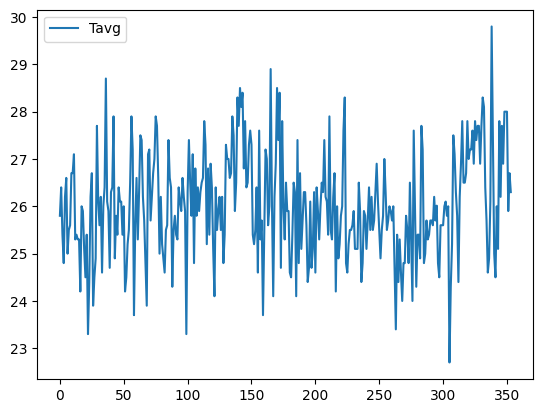

In [843]:
#plotting tavg
df1[['Tavg']].plot()

<Axes: >

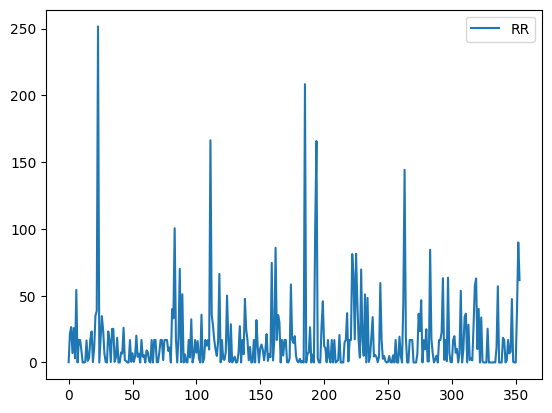

In [844]:
#plotting tavg
df1[['RR']].plot()

In [845]:
#shifting tx, tavg, dan rr
df1['ptx'] = df1.shift(-1)["Tx"]
df1['pta'] = df1.shift(-1)["Tavg"]
df1['ptr'] = df1.shift(-1)["RR"]
df1

,level_0,index,Tanggal,Tn,Tx,RR,Tavg,ptx,pta,ptr
0,0,0,2023-01-01,21.2,33.4,0.2,25.8,31.8,26.4,21.6
1,31,31,2023-01-02,22.0,31.8,21.6,26.4,30.6,25.4,26.5
2,59,60,2023-01-03,21.5,30.6,26.5,25.4,30.4,24.8,7.0
3,90,92,2023-01-04,21.8,30.4,7.0,24.8,32.4,26.2,25.7
4,120,123,2023-01-05,23.2,32.4,25.7,26.2,29.6,26.6,3.1
...,...,...,...,...,...,...,...,...,...,...
349,349,360,2023-12-16,22.7,31.8,0.0,28.0,31.6,28.0,0.0
350,350,361,2023-12-17,23.6,31.6,0.0,28.0,30.3,25.9,39.3
351,351,362,2023-12-18,23.7,30.3,39.3,25.9,31.0,26.7,89.9
352,352,363,2023-12-19,23.4,31.0,89.9,26.7,30.2,26.3,61.7


In [846]:
# ambil data RR, tavg, pta, ptr
df1 = df1[['RR', 'Tavg', 'pta', 'ptr']]
df1

,RR,Tavg,pta,ptr
0,0.2,25.8,26.4,21.6
1,21.6,26.4,25.4,26.5
2,26.5,25.4,24.8,7.0
3,7.0,24.8,26.2,25.7
4,25.7,26.2,26.6,3.1
...,...,...,...,...
349,0.0,28.0,28.0,0.0
350,0.0,28.0,25.9,39.3
351,39.3,25.9,26.7,89.9
352,89.9,26.7,26.3,61.7


In [847]:
#hapus yang kosong
df1 = df1.iloc[:-1, :].copy()
df1

,RR,Tavg,pta,ptr
0,0.2,25.8,26.4,21.6
1,21.6,26.4,25.4,26.5
2,26.5,25.4,24.8,7.0
3,7.0,24.8,26.2,25.7
4,25.7,26.2,26.6,3.1
...,...,...,...,...
348,0.5,28.0,28.0,0.0
349,0.0,28.0,28.0,0.0
350,0.0,28.0,25.9,39.3
351,39.3,25.9,26.7,89.9


In [848]:
#import library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [849]:
#buat indeks
df1['Indeks'] = df1.reset_index().index
df1

,RR,Tavg,pta,ptr,Indeks
0,0.2,25.8,26.4,21.6,0
1,21.6,26.4,25.4,26.5,1
2,26.5,25.4,24.8,7.0,2
3,7.0,24.8,26.2,25.7,3
4,25.7,26.2,26.6,3.1,4
...,...,...,...,...,...
348,0.5,28.0,28.0,0.0,348
349,0.0,28.0,28.0,0.0,349
350,0.0,28.0,25.9,39.3,350
351,39.3,25.9,26.7,89.9,351


In [850]:
#data training dan testing
X = df1[["Indeks", "Tavg"]]
y = df1["pta"]

In [851]:
#data spliting
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size = 0.2, random_state=0, shuffle = False)


In [852]:
#data fitting
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [853]:
X_test

,Indeks,Tavg
282,282,24.9
283,283,27.7
284,284,27.2
285,285,24.8
286,286,25.0
...,...,...
348,348,28.0
349,349,28.0
350,350,28.0
351,351,25.9


In [854]:
#testing
pred1 = lr.predict(X_test)
pred1

array([25.52051926, 26.28916479, 26.15089447, 25.49046047, 25.54456624,
       25.7360835 , 25.62529548, 25.65191895, 25.73350701, 25.73264819,
       25.70430706, 25.86834202, 25.7300717 , 25.81531888, 25.48101335,
       25.39770763, 25.69915408, 25.69829525, 25.69743642, 25.80650679,
       25.83313026, 25.74982453, 25.8039303 , 24.89615562, 25.33501356,
       25.58149542, 26.21272946, 26.10194144, 25.88122422, 25.7429539 ,
       25.35734289, 25.85116543, 26.04268269, 26.28916455, 25.93103584,
       25.93017701, 25.98428278, 26.28572923, 26.06501202, 26.11911778,
       26.11825895, 26.22732932, 26.0340944 , 26.28057626, 26.16978823,
       26.2513763 , 26.25051747, 26.02980025, 26.24879981, 26.41283477,
       26.35701135, 25.88895344, 25.69571852, 25.39255441, 25.47414248,
       25.80307123, 26.81905745, 26.15862345, 25.49818946, 25.35991914,
       25.77129478, 25.52309527, 26.2642585 , 25.82368289, 26.23505854,
       26.01434132, 26.31578778, 26.31492895, 26.31407012, 25.73

In [855]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
mae = mean_absolute_error(y_test, pred1)
mse = mean_squared_error(y_test, pred1)
print(mae, mse)

0.9143923946728041 1.4384170142514263


In [856]:
X_test['Indeks'] = X_test.index
X_test

,Indeks,Tavg
282,282,24.9
283,283,27.7
284,284,27.2
285,285,24.8
286,286,25.0
...,...,...
348,348,28.0
349,349,28.0
350,350,28.0
351,351,25.9


In [857]:
predd = pd.DataFrame(pred1).set_index(X_test['Indeks'])
predd

,0
Indeks,
282,25.520519
283,26.289165
284,26.150894
285,25.490460
286,25.544566
...,...
348,26.315788
349,26.314929
350,26.314070


In [858]:
kan = pd.concat([df1['Tavg'], predd], axis=1)
kan.sort_index(False).head(1000)

<ipython-input-858-a78c5f2a57f4>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only.
  kan.sort_index(False).head(1000)


,Tavg,0
0,25.8,NaN
1,26.4,NaN
2,25.4,NaN
3,24.8,NaN
4,26.2,NaN
...,...,...
348,28.0,26.315788
349,28.0,26.314929
350,28.0,26.314070
351,25.9,25.736083


<Axes: >

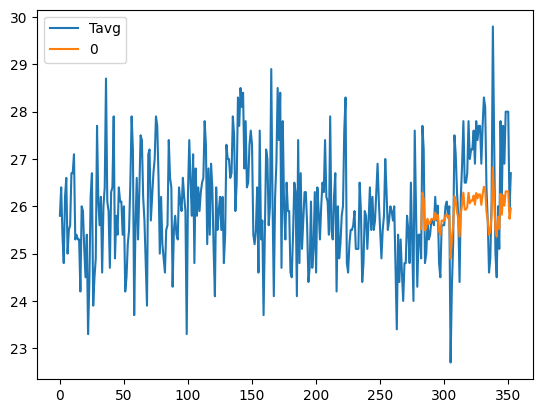

In [859]:
kan.plot()

In [860]:
new_data = [[354, 26.7],[355,26.7],[356,26.7],[357,26.7],[358,26.7],[359,26.7],[360,26.7]]
lr.predict(new_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([25.95336492, 25.95250609, 25.95164726, 25.95078843, 25.9499296 ,
       25.94907078, 25.94821195])

In [862]:
kan.to_json('Prediksi Sumatera Barat.json')